In [1]:
import json
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def get_simulation_metafile_path(img_id, eps_am, resolution, Wa_n=1e-3, Wa_p=1, kr=1, gamma=15, refined=False):
    if refined:
        return os.path.join("output/reaction_distribution/470-470-45/15-30/", str(int(img_id)), str(eps_am), str(resolution), f"{Wa_n}-{Wa_p}-{kr}", str(gamma), "simulation.json")
    else:
        return os.path.join("output/reaction_distribution/470-470-45/15-30/", str(int(img_id)), str(eps_am), "unrefined", str(resolution), f"{float(Wa_n)}-{float(Wa_p)}-{float(kr)}", str(gamma), "simulation.json")

In [3]:
def read_simulation_metafile(metafile_path):
    with open(metafile_path, "r") as fp:
        return json.load(fp)

In [4]:
df_rows = []
vol_fracs = np.linspace(0.1, 0.6, num=6, dtype=np.float16)
image_ids = [11]
wagner_nums = [0.1, 1.0, 10.0]
krs = [0.01, 1.0, 100.0]

for eps_am in vol_fracs:
    for Wa_p in wagner_nums:
        for img_id in image_ids:
            for kr in krs:
                sim_metafile = get_simulation_metafile_path(img_id=img_id, eps_am=eps_am, resolution=5.0, kr=kr, Wa_p=Wa_p)
                try:
                    row_data = read_simulation_metafile(sim_metafile)
                except FileNotFoundError:
                    continue
                row_data["eps_am"] = eps_am
                df_rows.append(row_data)

df = pd.DataFrame(df_rows, dtype=float)

In [5]:
df.head()

,Negative Wagner Number,Positive Wagner Number,Negative Overpotential [V],Positive Overpotential [V],Open Circuit Potential (OCP) [V],Voltage,interior penalty (gamma),interior penalty kr-modified (gamma),ionic to electronic conductivity ratio (kr),average potential left [V],...,Current at negative am - electrolyte boundary [A],Current at electrolyte - positive am boundary [A],Current at right boundary [A],Current at insulated boundary [A],stdev i positive charge transfer [A/m2],stdev i positive charge transfer (normalized),solver atol,solver rtol,Total resistance [Ω.cm2],eps_am
0,0.001,0.1,-7.395324e-07,1.011734e-07,0.0,1.0,15.0,100.0,0.01,-7.395324e-07,...,0.000005,0.000011,0.000008,5.237992e-11,15.679741,1.558054,1.000000e-15,0.000001,791.388058,0.099976
1,0.001,0.1,-5.270823e-05,3.121255e-07,0.0,1.0,15.0,100.0,1.00,-5.270823e-05,...,0.000319,0.000534,0.000531,2.288777e-07,459.254145,0.965292,1.000000e-15,0.000001,12.042709,0.099976
2,0.001,0.1,-7.203257e-04,4.046119e-07,0.0,1.0,15.0,100.0,100.00,-7.203257e-04,...,0.003625,0.005205,0.005461,1.442683e-02,4184.837868,0.901875,1.000000e-15,0.000001,1.171985,0.099976
3,0.001,1.0,-5.785301e-07,9.762881e-08,0.0,1.0,15.0,100.0,0.01,-5.785301e-07,...,0.000004,0.000007,0.000006,4.223406e-11,4.926447,0.743297,1.000000e-15,0.000001,1066.693331,0.099976
4,0.001,1.0,-4.575850e-05,3.160512e-07,0.0,1.0,15.0,100.0,1.00,-4.575850e-05,...,0.000268,0.000459,0.000452,2.004354e-07,325.367702,0.795490,1.000000e-15,0.000001,14.156156,0.099976


### $\frac{\kappa}{\sigma}$ = 0.01

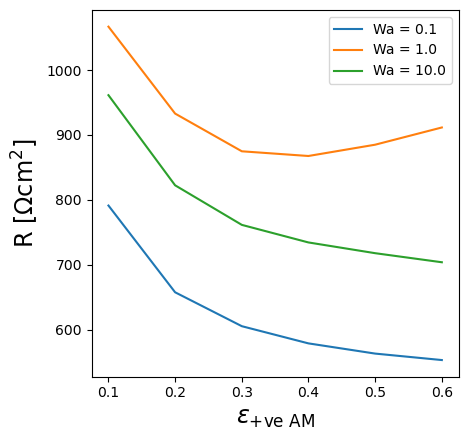

In [6]:
df_001 = df[np.isclose(df["ionic to electronic conductivity ratio (kr)"], 0.01)]
fig, ax = plt.subplots(figsize=(5, 4.5))
for wa in wagner_nums:
    df_ = df_001[np.isclose(df_001['Positive Wagner Number'], wa)]
    ax.plot(df_['eps_am'], df_['Total resistance [Ω.cm2]'], label=f'Wa = {wa}')
ax.set_box_aspect(1)
ax.legend()
ax.set_ylabel(r'R [$\Omega\mathrm{cm}^2$]', fontdict={'fontsize': 'xx-large'})
ax.set_xlabel(r'$\varepsilon_{\mathrm{+ve\ AM}}$', fontdict={'fontsize': 'xx-large'})
plt.tight_layout()
plt.savefig(f'figures/reaction_distribution/resistance-kr0.01.png', bbox_inches="tight")

### $\frac{\kappa}{\sigma}$ = 1

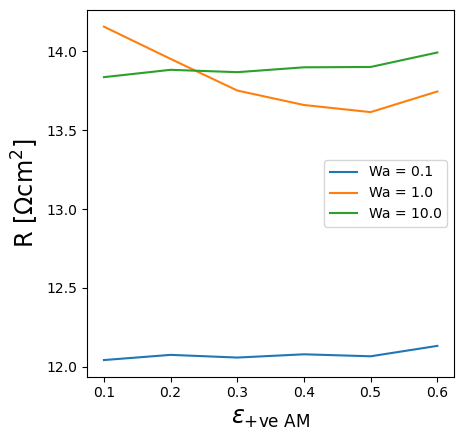

In [7]:
df_1 = df[np.isclose(df["ionic to electronic conductivity ratio (kr)"], 1)]
fig, ax = plt.subplots(figsize=(5, 4.5))
for wa in wagner_nums:
    df_ = df_1[np.isclose(df_1['Positive Wagner Number'], wa)]
    ax.plot(df_['eps_am'], df_['Total resistance [Ω.cm2]'], label=f'Wa = {wa}')
ax.set_box_aspect(1)
ax.legend()
ax.set_ylabel(r'R [$\Omega\mathrm{cm}^2$]', fontdict={'fontsize': 'xx-large'})
ax.set_xlabel(r'$\varepsilon_{\mathrm{+ve\ AM}}$', fontdict={'fontsize': 'xx-large'})
plt.tight_layout()
plt.savefig(f'figures/reaction_distribution/resistance-kr1.png', bbox_inches="tight")

### $\frac{\kappa}{\sigma}$ = 100

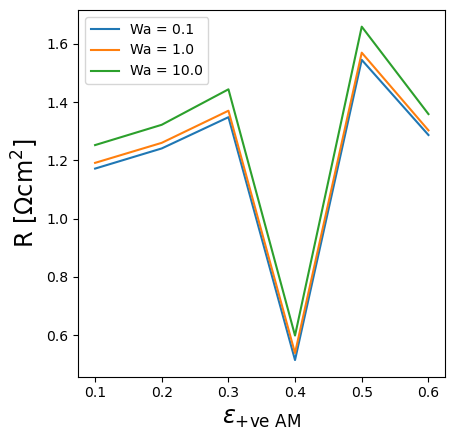

In [8]:
df_100 = df[np.isclose(df["ionic to electronic conductivity ratio (kr)"], 100)]
fig, ax = plt.subplots(figsize=(5, 4.5))
for wa in wagner_nums:
    df_ = df_100[np.isclose(df_100['Positive Wagner Number'], wa)]
    ax.plot(df_['eps_am'], df_['Total resistance [Ω.cm2]'], label=f'Wa = {wa}')
ax.set_box_aspect(1)
ax.legend()
ax.set_ylabel(r'R [$\Omega\mathrm{cm}^2$]', fontdict={'fontsize': 'xx-large'})
ax.set_xlabel(r'$\varepsilon_{\mathrm{+ve\ AM}}$', fontdict={'fontsize': 'xx-large'})
plt.tight_layout()
plt.savefig(f'figures/reaction_distribution/resistance-kr100.png', bbox_inches="tight")

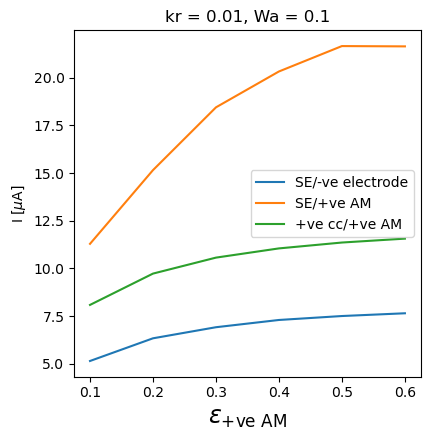

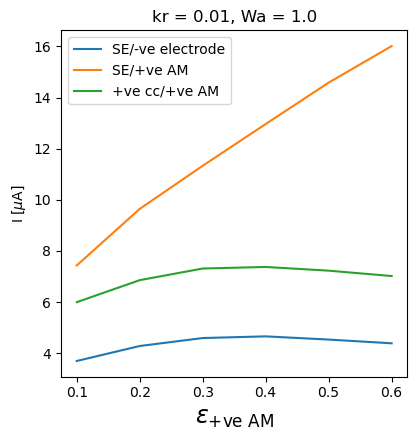

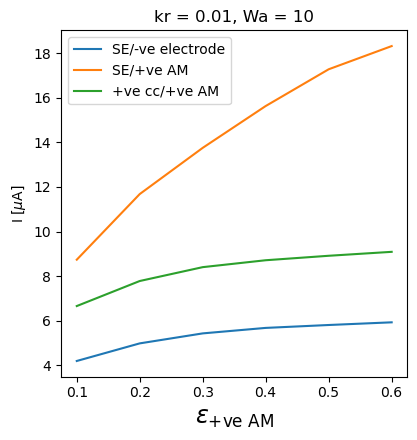

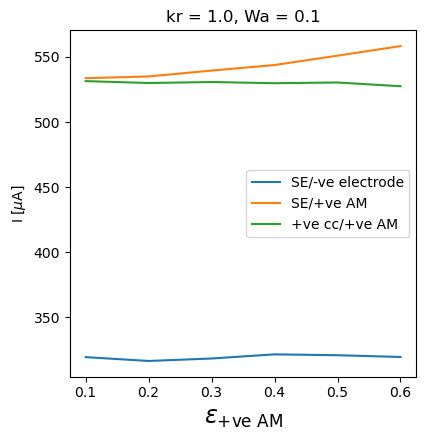

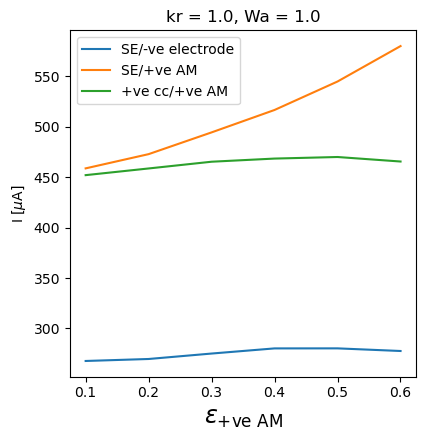

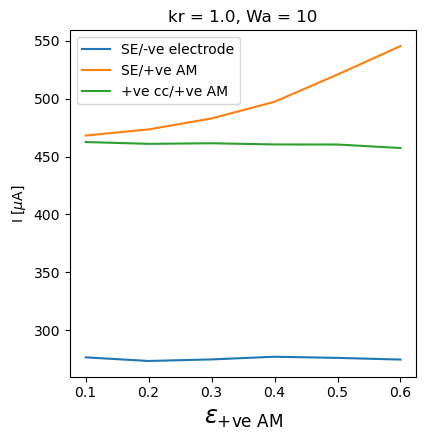

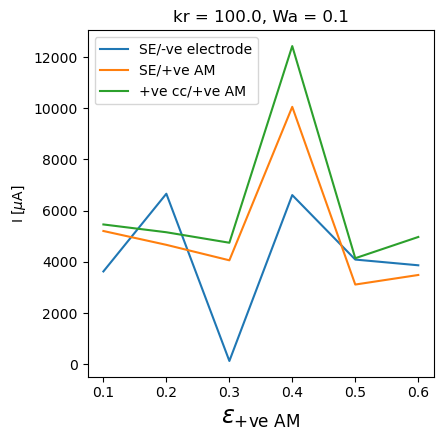

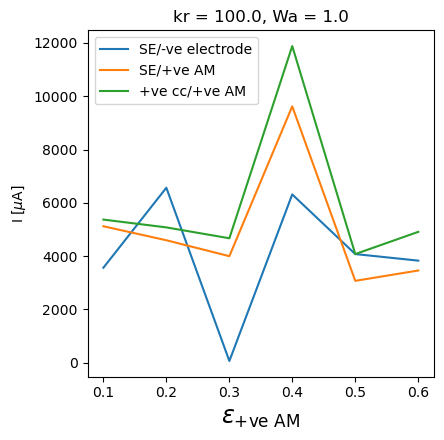

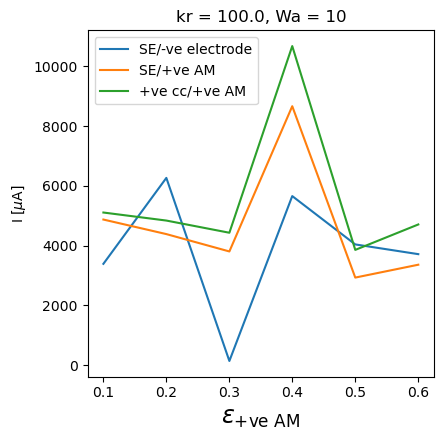

In [12]:
for kr in [0.01, 1.0, 100.0]:
    for wa in [0.1, 1.0, 10]:
        df_ = df[np.logical_and(np.isclose(df['Positive Wagner Number'], wa), np.isclose(df['ionic to electronic conductivity ratio (kr)'], kr))]
        fig, ax = plt.subplots(figsize=(5, 4.5))
        ax.plot(df_['eps_am'], 1e6*df_['Current at negative am - electrolyte boundary [A]'], label='SE/-ve electrode')
        ax.plot(df_['eps_am'], 1e6*df_['Current at electrolyte - positive am boundary [A]'], label='SE/+ve AM')
        ax.plot(df_['eps_am'], 1e6*df_['Current at right boundary [A]'], label='+ve cc/+ve AM')
        ax.set_box_aspect(1)
        ax.legend()
        ax.set_title(f'kr = {kr}, Wa = {wa}')
        ax.set_xlabel(r'$\varepsilon_{\mathrm{+ve\ AM}}$', fontdict={'fontsize': 'xx-large'})
        ax.set_ylabel(r'I [$\mu$A]')
        plt.tight_layout()